# Sketch

Sketch is an AI code-writing assistant for pandas users that understands the context of your data, greatly improving the relevance of suggestions. Sketch is usable in seconds and doesn't require adding a plugin to your IDE.

- https://pypi.org/project/sketch/
    
    
- https://github.com/approximatelabs/sketch
    

In [3]:
# Installation

# !pip install sketch

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Automate EDA

import sketch

## Load Wine Dataset

In [2]:
df_wine = pd.read_csv(r"C:\Users\ariel\OneDrive\Desktop\CCT College\GitHub\Automated EDA\Datasets\sklearn_datasets\wine.csv")

In [3]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### .sketch.ask

Ask is a basic question-answer system on sketch, this will return an answer in text that is based off of the summary statistics and description of the data.

Use ask to get an understanding of the data, get better column names, ask hypotheticals (how would I go about doing X with this data), and more.

In [76]:
q = 'What is this dataset about?'
df_wine.sketch.ask(q)

In [78]:
q = 'Can you give me friendly names and single sentence descriptions of each column? (format output as HTML List)'
df_wine.sketch.ask(q)

In [19]:
q = 'Tell me the average of proanthocyanins column'
df_wine.sketch.ask(q)

In [20]:
q = 'are you sure the me the average of proanthocyanins column is 1.5711764705882351?'
df_wine.sketch.ask(q)

In [5]:
df_wine['proanthocyanins'].mean()

1.5908988764044945

In [22]:
q = 'Tell me the mean of alcohol column'
df_wine.sketch.ask(q)

In [28]:
q = 'Tell me the mean, median and mode of alcohol column'
df_wine.sketch.ask(q)

In [26]:
mean = df_wine['alcohol'].mean()
median = df_wine['alcohol'].median()
mode = df_wine['alcohol'].mode()

print(mean)
print(median)
print(mode)

13.00061797752809
13.05
0    12.37
1    13.05
Name: alcohol, dtype: float64


In [33]:
q = 'What is the maximum value in each column in the dataframe df_wine? the output should be in a list with the column name'
df_wine.sketch.ask(q)

In [37]:
df_wine.max()

alcohol                           14.83
malic_acid                         5.80
ash                                3.23
alcalinity_of_ash                 30.00
magnesium                        162.00
total_phenols                      3.88
flavanoids                         5.08
nonflavanoid_phenols               0.66
proanthocyanins                    3.58
color_intensity                   13.00
hue                                1.71
od280/od315_of_diluted_wines       4.00
proline                         1680.00
target                             2.00
dtype: float64

In [38]:
q = 'how to make df columns clearer?'
df_wine.sketch.ask(q)

### .sketch.howto

Howto is the basic "code-writing" prompt in sketch. This will return a code-block you should be able to copy paste and use as a starting point (or possibly ending!) for any question you have to ask of the data. Ask this how to clean the data, normalize, create new features, plot, and even build models!

In [39]:
q = 'how to make df columns clearer?'
df_wine.sketch.howto(q)

In [29]:
df_wine.sketch.howto("Plot correlations")

<AxesSubplot: >

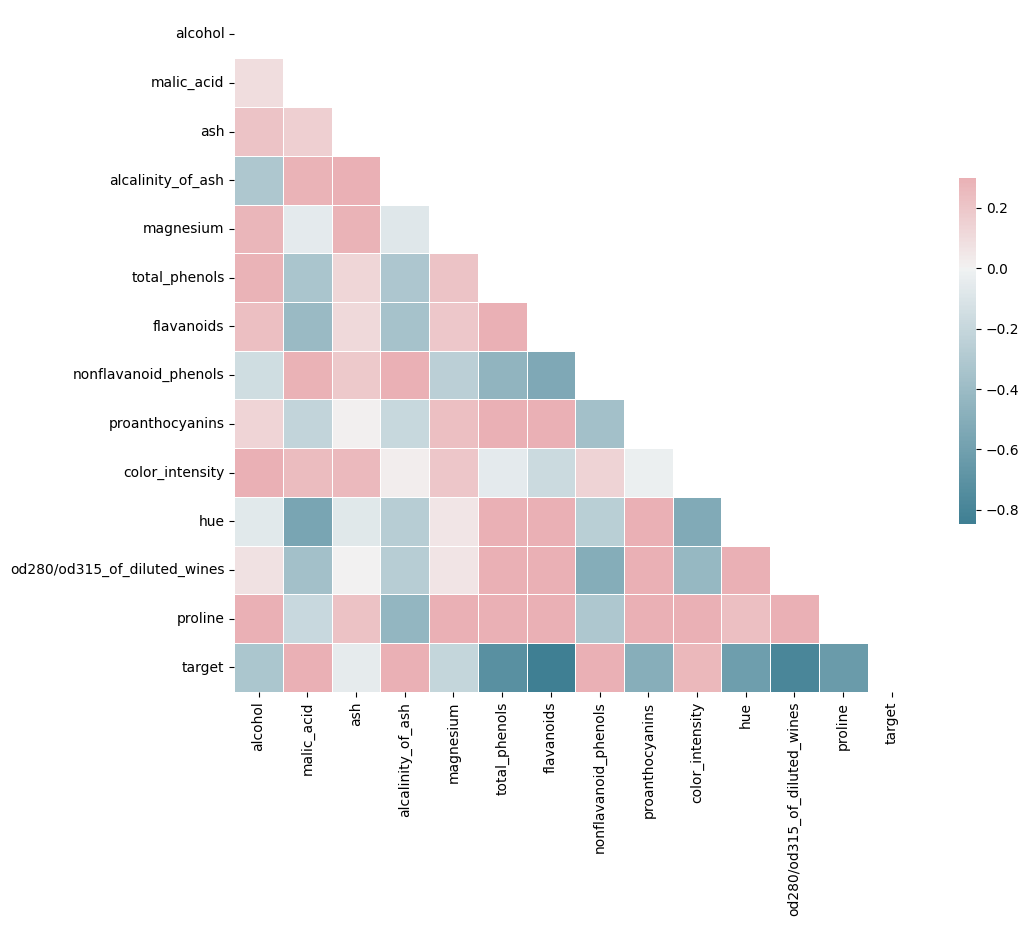

In [32]:
# Plot correlations
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = df_wine.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [42]:
q = 'Plot jointplot of the most correlated features?'
df_wine.sketch.howto(q)

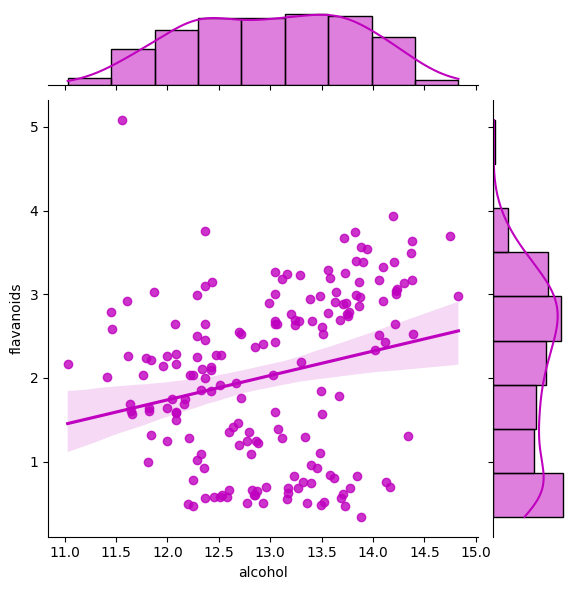

In [43]:
# calculate correlation matrix
corr = df_wine.corr()

# plot jointplot of the most correlated features
sns.jointplot(x="alcohol", y="flavanoids", data=df_wine, kind="reg", color="m")
plt.show()

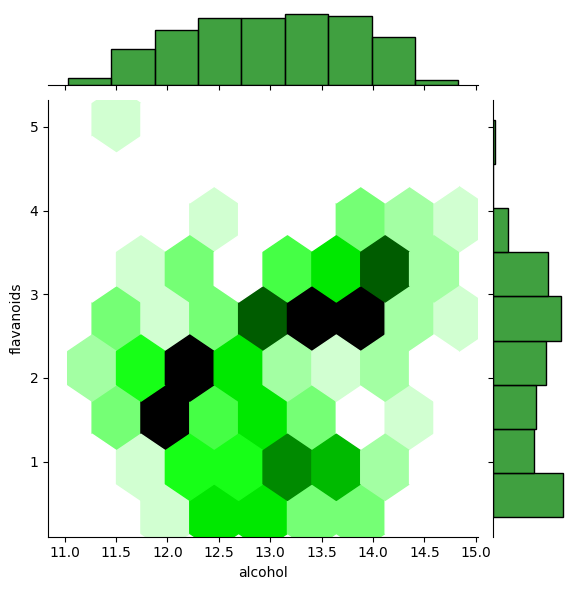

In [52]:
# calculate correlation matrix
corr = df_wine.corr()

# plot jointplot of the most correlated features
sns.jointplot(x="alcohol", y="flavanoids", data=df_wine, kind="hex", color="g")
plt.show()

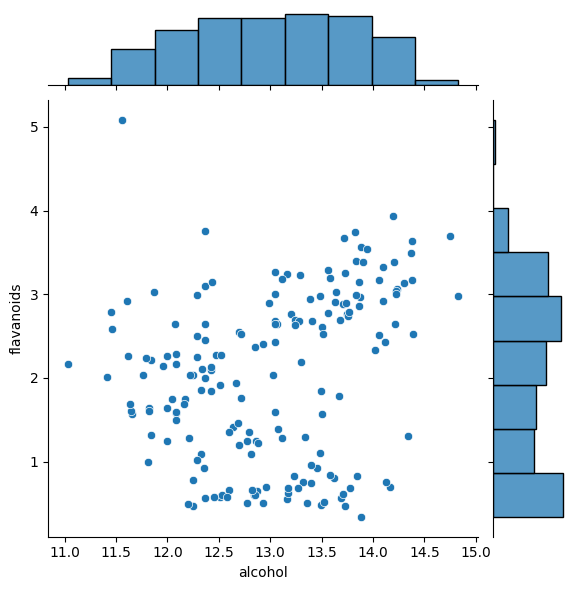

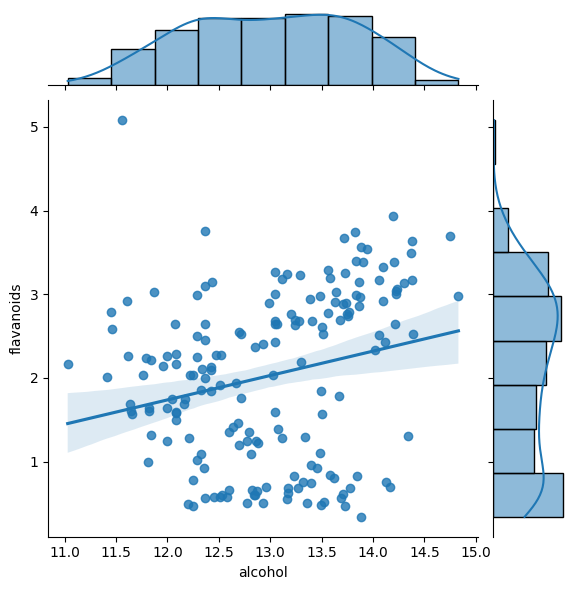

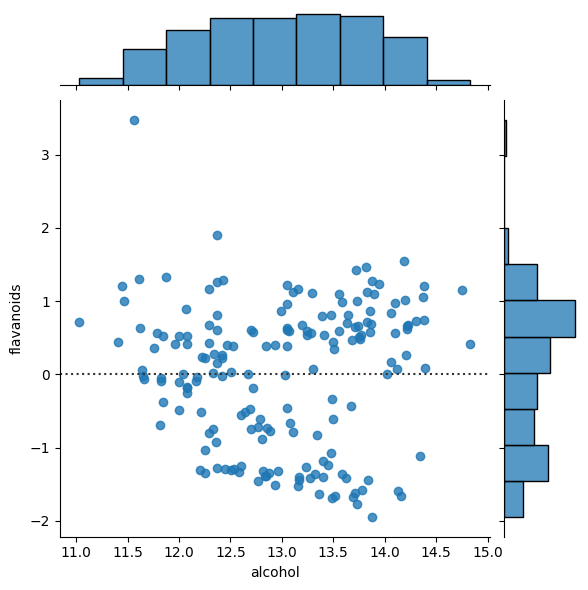

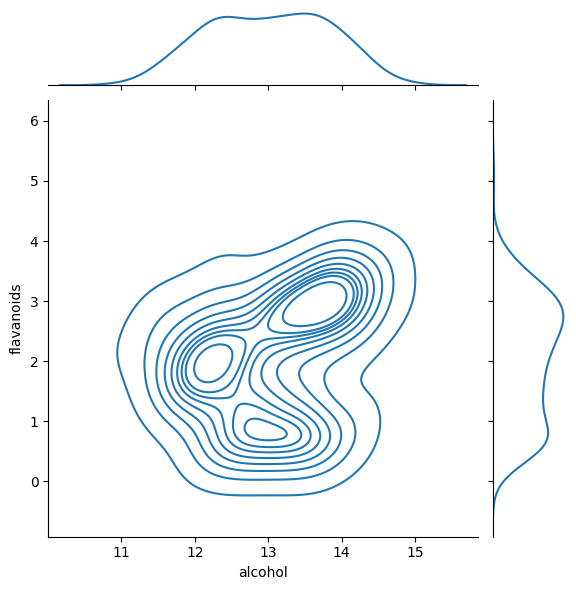

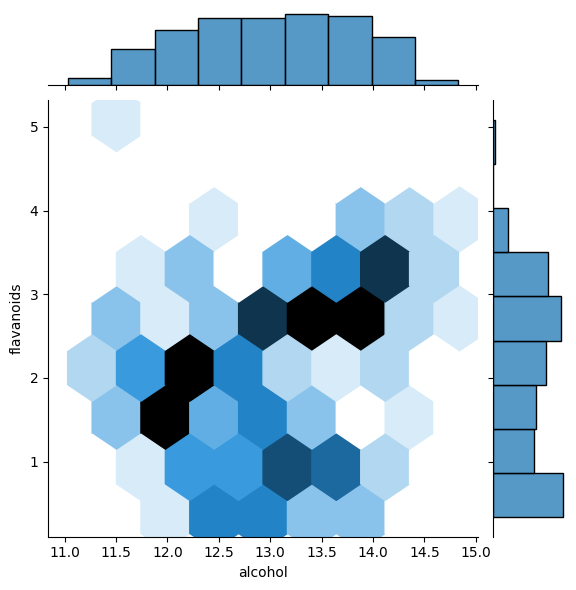

In [53]:
kind = ['scatter', 'reg', 'resid', 'kde', 'hex']
# colors = ['m', 'g', 'o', 'r', 'y']

for kind in kind:
    sns.jointplot(x="alcohol", y="flavanoids", data=df_wine, kind=kind)    

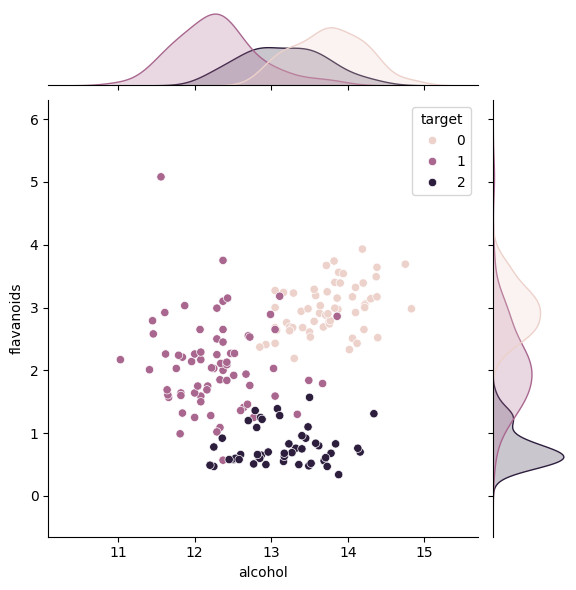

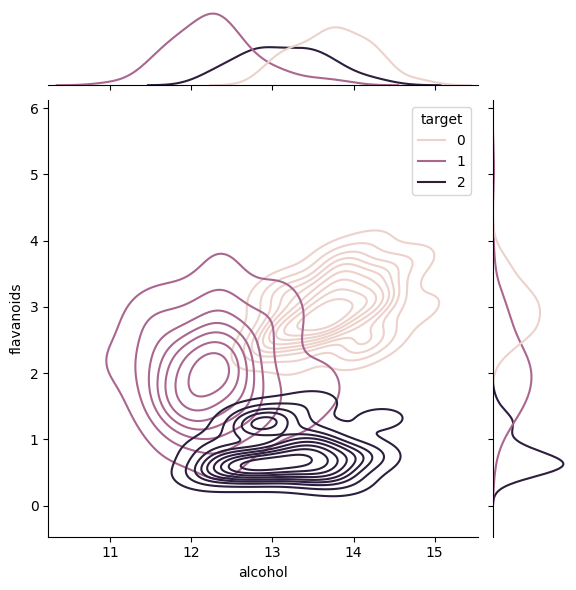

In [57]:
# ValueError: Use of `hue` with `kind='reg'` is not currently supported.
# ValueError: Use of `hue` with `kind='resid'` is not currently supported.
# ValueError: Use of `hue` with `kind='hex'` is not currently supported.

kind = ['scatter', 'kde']
# colors = ['m', 'g', 'o', 'r', 'y']

for kind in kind:
    sns.jointplot(x="alcohol", y="flavanoids", data=df_wine, kind=kind, hue='target') 

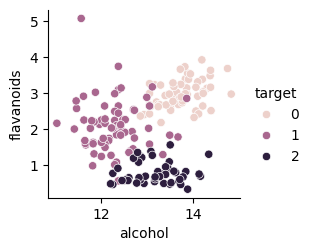

In [72]:
sns.pairplot(x_vars="alcohol", y_vars="flavanoids", data=df_wine, hue='target');

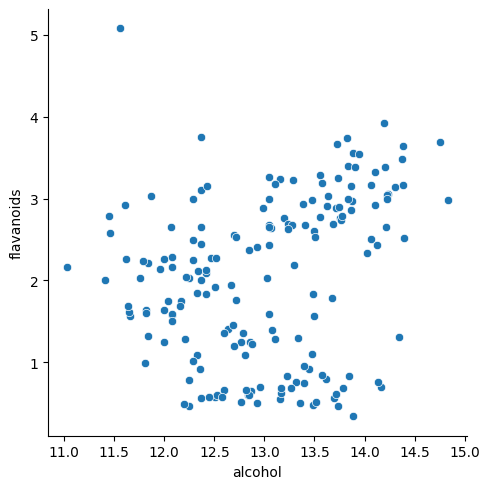

In [70]:
sns.relplot(x="alcohol", y="flavanoids", data=df_wine);

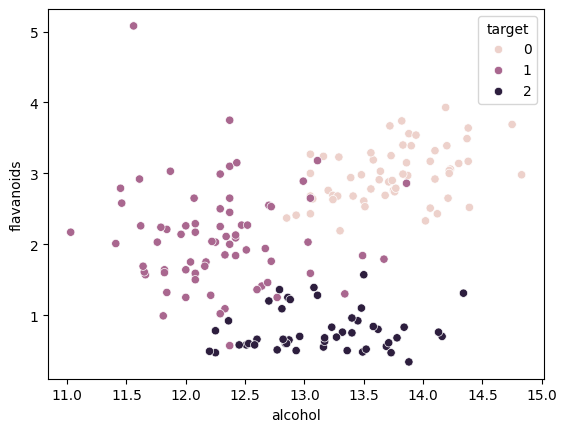

In [71]:
sns.scatterplot(x="alcohol", y="flavanoids", data=df_wine, hue='target');

## Load supermarket Dataset

In [73]:
df_super = pd.read_csv(r"C:\Users\ariel\OneDrive\Desktop\CCT College\GitHub\Automated EDA\Datasets\datasets\supermarket_sales.csv")

In [74]:
df_super

,Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2021,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2021,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2021,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2021,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2021,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2021,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2021,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2021,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2021,15:33,Cash,65.82,4.761905,3.2910,4.1


### .sketch.ask

In [75]:
q = 'What is this dataset about?'
df_super.sketch.ask(q)

In [77]:
q = 'Can you give me friendly names and single sentence descriptions of each column? (format output as HTML List)'
df_super.sketch.ask(q)

### .sketch.howto

In [80]:
q = 'Analyse the relationship between rating and total sale of the df_super'
df_super.sketch.howto(q)

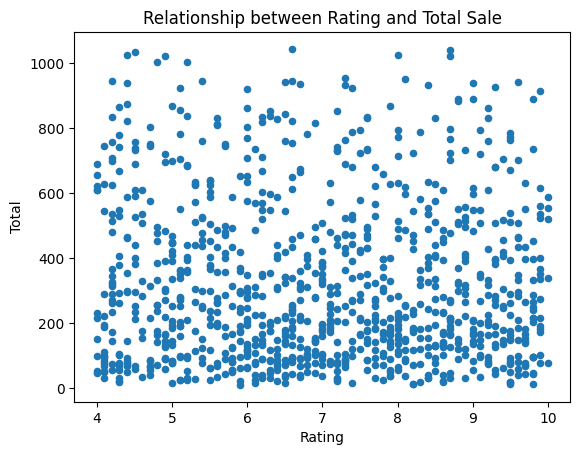

In [81]:
# create a scatter plot to analyse the relationship between rating and total sale
df_super.plot.scatter(x='Rating', y='Total', title='Relationship between Rating and Total Sale')
plt.show()

In [84]:
q = 'Calculate the product lines with the highest profits for df_super'
df_super.sketch.howto(q)

In [88]:
# Calculate the total revenue for each product line
df_super['Total_Revenue'] = df_super['Unit price'] * df_super['Quantity']

# Group by product line and calculate the sum of total revenue
product_line_profits = df_super.groupby('Product line')['Total_Revenue'].sum()

# Sort the product lines by total revenue in descending order
product_line_profits.sort_values(ascending=False, inplace=True)

product_line_profits.head().reset_index()

,Product line,Total_Revenue
0,Food and beverages,53471.28
1,Sports and travel,52497.93
2,Electronic accessories,51750.03
3,Fashion accessories,51719.90
4,Home and lifestyle,51297.06


In [92]:
df_super['Product line'].value_counts(normalize=True) * 100

Fashion accessories       17.8
Food and beverages        17.4
Electronic accessories    17.0
Sports and travel         16.6
Home and lifestyle        16.0
Health and beauty         15.2
Name: Product line, dtype: float64

In [93]:
q = 'Create a plot to show sales by gender'
df_super.sketch.howto(q)

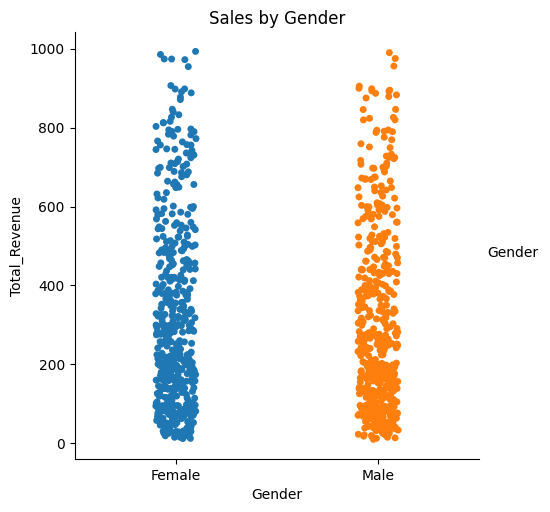

In [95]:
# create a plot to show sales by gender
sns.catplot(x="Gender", y="Total_Revenue", data=df_super, hue='Gender')
plt.title("Sales by Gender")
plt.show()

In [96]:
q = 'Create a plot to show sales by month'
df_super.sketch.howto(q)

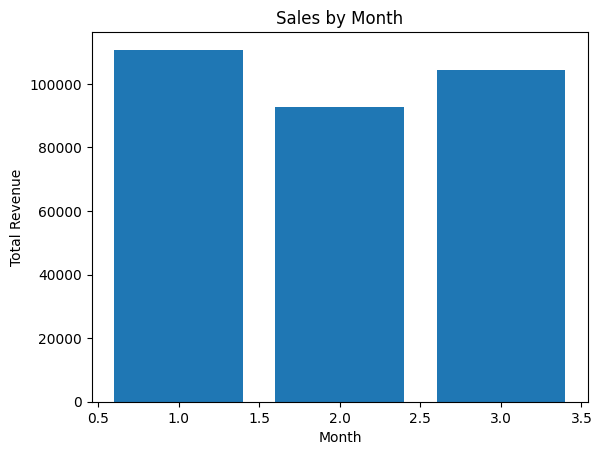

In [98]:
# convert date column to datetime format
df_super['Date'] = pd.to_datetime(df_super['Date'])

# extract month from date column and create new column
df_super['Month'] = df_super['Date'].dt.month

# group by month and calculate total revenue for each month
monthly_sales = df_super.groupby('Month')['Total_Revenue'].sum()

# plot the data
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Sales by Month')
plt.show()

In [107]:
dir(df_super.sketch)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_obj',
 'apply',
 'ask',
 'howto']